# Data Set

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

df=pd.read_csv('scrape_data_v1.csv', sep=',',index_col=0) 
df

,street,city_state,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,url
0,2668 67Th Ave,"Oakland, CA 94605",649000,3Beds,2Baths,"1,374Sq Ft",82 / 100,57 / 100,66 / 100,78Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Oakland/2668-67th-A...
1,311 Oak St #329,"Oakland, CA 94607",949000,2Beds,2Baths,"1,830Sq Ft",94 / 100,83 / 100,89 / 100,61Somewhat CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Oakland/311-Oak-St-...
2,22103 Vista Del Plaza Ln #11,"Hayward, CA 94541",589000,2Beds,2Baths,"1,171Sq Ft",79 / 100,46 / 100,60 / 100,80Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/22103-Vista...
3,882 Cole Cmn,"Livermore, CA 94551",889000,3Beds,2.5Baths,"1,848Sq Ft",58 / 100,0,56 / 100,91Most CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Livermore/882-Cole-...
4,133 Frisbie St,"Oakland, CA 94611",949000,3Beds,2Baths,"1,452Sq Ft",91 / 100,63 / 100,76 / 100,59Somewhat CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Oakland/133-Frisbie...
...,...,...,...,...,...,...,...,...,...,...,...
819,27895 Adobe Ct,"Hayward, CA 94542",1699999,5Beds,3Baths,"2,650Sq Ft",0,0,0,90Most CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/27895-Adobe...
820,378 Smalley Ave,"HAYWARD, CA 94541",720000,2Beds,1Bath,938Sq Ft,71 / 100,61 / 100,73 / 100,84Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/378-Smalley...
821,372 Smalley Ave,"HAYWARD, CA 94541",720000,2Beds,1Bath,"1,097Sq Ft",71 / 100,61 / 100,73 / 100,84Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/372-Smalley...
822,230 Smalley Ave,"HAYWARD, CA 94541",3400000,11Beds,10Baths,"4,364Sq Ft",66 / 100,57 / 100,74 / 100,0,https://www.redfin.com//CA/Hayward/230-Smalley...


# Columns in Data Set

In [2]:
df.columns

Index(['street', 'city_state', 'price', 'bed', 'bath', 'sqft', 'walkscore',
       'transitscore', 'bikescore', 'competitivescore', 'url'],
      dtype='object')

# Data Cleaning

814

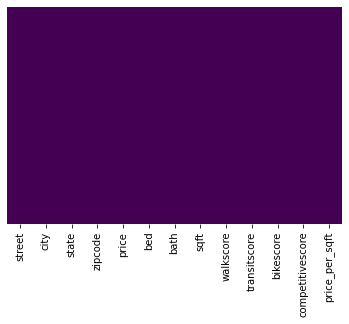

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #To check attributes with null values 

df.dropna(axis=0,subset=['street', 'city', 'state', 'zipcode', 'price', 'sqft',
       'walkscore', 'transitscore', 'bikescore', 'competitivescore',                  #drop nulls because some entries have only unique records which inappropriately biases the model
       'price_per_sqft','bed'],inplace=True)

df.drop(df[df['price_per_sqft']=='#VALUE!']['price_per_sqft'].index,inplace=True)
df.drop(df[df['sqft']=="Äî'"]['sqft'].index,inplace=True)

df['bed'].replace('', np.nan, inplace=True) #converting blanks to nan
df.dropna(subset=['bed'], inplace=True)     #dropping nan values
df['bath'].replace('', np.nan, inplace=True)
df.dropna(subset=['bath'], inplace=True)



df['city']=df['city'].apply(lambda x:x[0]+x[1:].lower()) #normalizing values across all cities


df['walkscore']=df['walkscore'].astype(int) # converting walkscore to integer

df['price']=df['price'].astype(int) # converting price to integer

df['price_per_sqft']=df['price_per_sqft'].astype(float) # converting price to integer

len(df)

# Total Unique cities in data set

In [4]:
df.city_state.unique()

array(['Oakland, CA 94605', 'Oakland, CA 94607', 'Hayward, CA 94541',
       'Livermore, CA 94551', 'Oakland, CA 94611', 'Oakland, CA 94621',
       'Fremont, CA 94538', 'Pleasanton, CA 94588', 'Fremont, CA 94536',
       'San Leandro, CA 94579', 'Newark, CA 94560',
       'San Leandro, CA 94577', 'Hayward, CA 94542',
       'Union City, CA 94587', 'Oakland, CA 94601', 'Albany, CA 94706',
       'Hayward, CA 94544', 'Oakland, CA 94610', 'Oakland, CA 94602',
       'Emeryville, CA 94608', 'Fremont, CA 94539',
       'SAN LORENZO, CA 94580', 'Berkeley, CA 94710', 'ALAMEDA, CA 94501',
       'CASTRO VALLEY, CA 94546', 'NEWARK, CA 94560',
       'Livermore, CA 94550', 'Fremont, CA 94555', 'Oakland, CA 94606',
       'Oakland, CA 94618', 'HAYWARD, CA 94541',
       'Castro Valley, CA 94546', 'Berkeley, CA 94702',
       'HAYWARD, CA 94545', 'San Leandro, CA 94578',
       'San Leandro, CA 94577-3837', 'Oakland, CA 94608',
       'Pleasanton, CA 94566', 'Dublin, CA 94568', 'UNION CITY, CA 94

In [5]:
new_df=df[(df.city=='Alameda')|(df.city=='Berkeley')|(df.city=='Campbell')|(df.city=='Cupertino')|(df.city=='Fremont')|(df.city=='Gilroy')|(df.city=='Hayward')|(df.city=='Livermore')|(df.city=='Los angeles') |(df.city=='Milpitas')|(df.city=='Morgan hill')|(df.city=='Mountain view') |(df.city=='Newark') |(df.city=='Oakland')|(df.city=='Riverside')]
new_df

,street,city,state,zipcode,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,price_per_sqft
1,2260 A San Jose Ave,Alameda,CA,94501,689000,1.0,1.0,572.0,91,49.0,74.0,87.0,1204.55
2,888 Willow St,Alameda,CA,94501,1680000,5.0,5.5,3090.0,78,47.0,70.0,87.0,543.69
3,1071 Melrose Ave,Alameda,CA,94502,699000,2.0,2.0,1247.0,43,30.0,55.0,92.0,560.55
4,1041 Melrose Ave,Alameda,CA,94502,929000,3.0,2.5,1738.0,42,30.0,55.0,92.0,534.52
6,1837 Santa Clara Ave,Alameda,CA,94501,1280000,5.0,1.5,2310.0,85,48.0,82.0,87.0,554.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1635 Starlite Dr,Milpitas,CA,95035,1398888,5.0,2.5,1692.0,35,47.0,60.0,85.0,826.77
874,49002 Cinnamon Fern Cmn #214,Fremont,CA,94539,899888,2.0,2.0,1274.0,60,38.0,71.0,72.0,706.35
875,109 Parc Place Dr,Milpitas,CA,95035,960000,3.0,2.0,1530.0,77,48.0,77.0,73.0,627.45
876,484 Dempsey Rd #186,Milpitas,CA,95035,385000,1.0,1.0,676.0,70,26.0,69.0,85.0,569.53


# City Wise Minimum/Maximum and Avg Price Details

In [6]:
new_data = new_df.groupby('city')['price'].agg({'min','max','mean'}).round(2)
print(new_data)

                   max     min        mean
city                                      
Alameda        2900000  419000  1116481.00
Berkeley       2350000  895000  1349750.00
Campbell       1350000  879000  1042333.33
Cupertino      6500000  910000  2635361.00
Fremont        2519000  685000  1278984.00
Gilroy         3650000  252900  1283068.80
Hayward        2480000  227000   801040.77
Livermore      2200000  664900  1253286.22
Los angeles    2499000  649000  1266000.00
Milpitas       1988000  385000  1093088.19
Morgan hill    1688000  669000  1120833.33
Mountain view  3498000  898000  2245680.44
Newark         1788000  799000  1182000.00
Oakland        3400000  599999  1072320.68
Riverside      1239999  724499   982249.00


# Plotting City Wise Minimum/Maximum and Avg Price Details

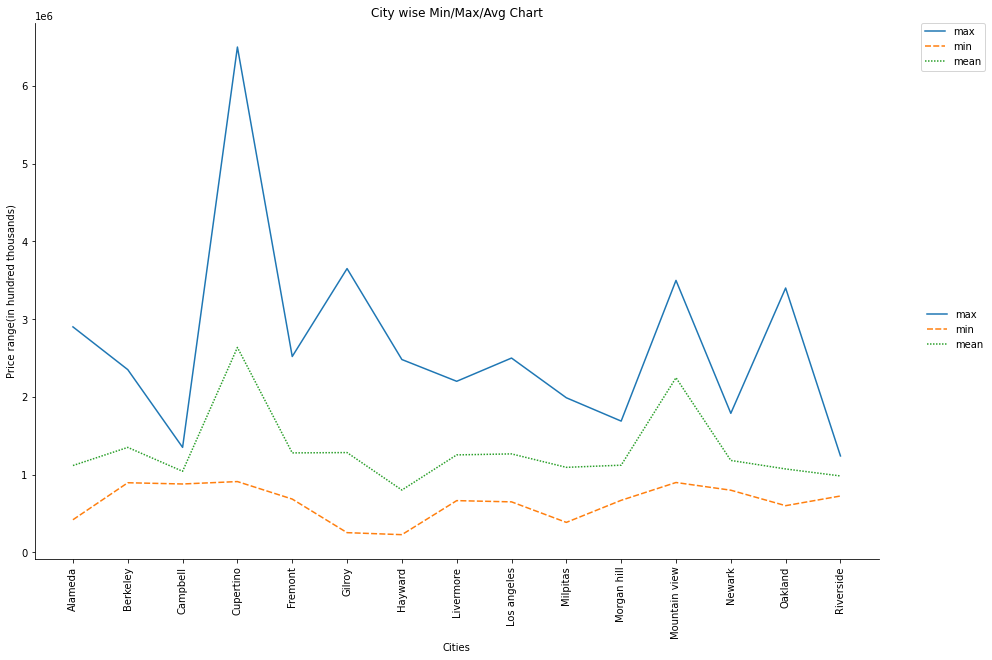

In [7]:
sns.relplot(data=new_data, kind='line',
            height=5, aspect=1,linestyle='solid'
           )

plt.title('City wise Min/Max/Avg Chart')
plt.ylabel('Price range(in hundred thousands)')
plt.xlabel('Cities')
plt.subplots_adjust(right=2, top=1.5, left=0.01, bottom=0.01)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=1)



# Printing columns such as city, state, price and bed

In [8]:
df[['city', 'state', 'price', 'bed']].head(10)

,city,state,price,bed
1,Alameda,CA,689000,1.0
2,Alameda,CA,1680000,5.0
3,Alameda,CA,699000,2.0
4,Alameda,CA,929000,3.0
6,Alameda,CA,1280000,5.0
7,Alameda,CA,1398000,3.0
8,Alameda,CA,775000,4.0
9,Alameda,CA,950000,3.0
10,Alameda,CA,1765000,4.0
11,Alameda,CA,1298000,3.0


# Checking for null values if any

In [9]:
df.isnull().sum()

street              0
city                0
state               0
zipcode             0
price               0
bed                 0
bath                0
sqft                0
walkscore           0
transitscore        0
bikescore           0
competitivescore    0
price_per_sqft      0
dtype: int64

# Total number of apartments in different cities across California

San francisco      263
Alameda            124
Hayward             83
Oakland             53
San jose            51
Milpitas            43
Mountain view       16
Sunnyvale           13
Gilroy              10
San diego           10
Pleasanton          10
San luis obispo     10
Livermore            9
Santa rosa           9
Cupertino            8
Berkeley             8
Fremont              7
Daly city            6
Santa clara          6
Morgan hill          6
Palo alto            5
San leandro          5
Dublin               5
Los gatos            4
Campbell             3
Sacramento           3
Los angeles          3
Newark               3
Santa barbara        3
San mateo            3
Saratoga             3
Piedmont             3
Pacifica             2
San lorenzo          2
Riverside            2
Orinda               2
San bruno            2
Monte sereno         1
Los altos            1
Albany               1
Fresno               1
Long beach           1
Stockton             1
Castro vall

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'San francisco'),
  Text(1, 0, 'Alameda'),
  Text(2, 0, 'Hayward'),
  Text(3, 0, 'Oakland'),
  Text(4, 0, 'San jose')])

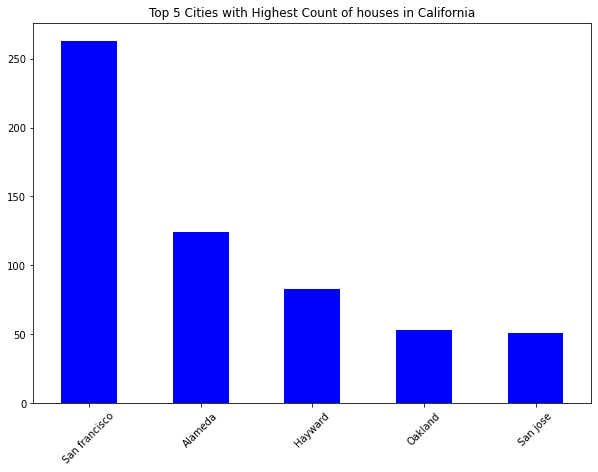

In [10]:
highest_count_houses = df['city'].value_counts() 
print(highest_count_houses)

plt.figure(figsize=(10,7))
highest_count_houses[:5].plot(kind = "bar",color = 'b')
plt.title('Top 5 Cities with Highest Count of houses in California')
plt.xticks(rotation = 45)

# Total number of apartments as per number of bed

In [11]:
#Total Number of beds

c = df.sort_values(by='bed')
Series=c['bed'].value_counts() 
Series

3.0     315
2.0     187
4.0     177
5.0      55
1.0      47
6.0      17
8.0       7
7.0       6
9.0       2
11.0      1
Name: bed, dtype: int64

# Crosstable for total number of apartments with 1,2,3,4 and 5 bed in San Francisco, Alameda, Hayward, Oakland and San Jose

In [12]:
#number of houses with 1,2,3,4 and 5 bed in different cities

xt = pd.crosstab(df['city'],df['bed'])
xt.loc[['San francisco','Alameda','Hayward', 'Oakland', 'San jose'],[1,2,3,4,5]]

bed,1,2,3,4,5
city,,,,,
San francisco,30,73,87,48,15
Alameda,6,39,42,17,7
Hayward,1,23,48,11,0
Oakland,1,11,19,12,7
San jose,0,9,21,15,6


# Plotting bar graph for total number of apartments with 1,2,3,4 and 5 bed in San Francisco, Alameda, Hayward, Oakland and San Jose

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'San francisco'),
  Text(1, 0, 'Alameda'),
  Text(2, 0, 'Hayward'),
  Text(3, 0, 'Oakland'),
  Text(4, 0, 'San jose')])

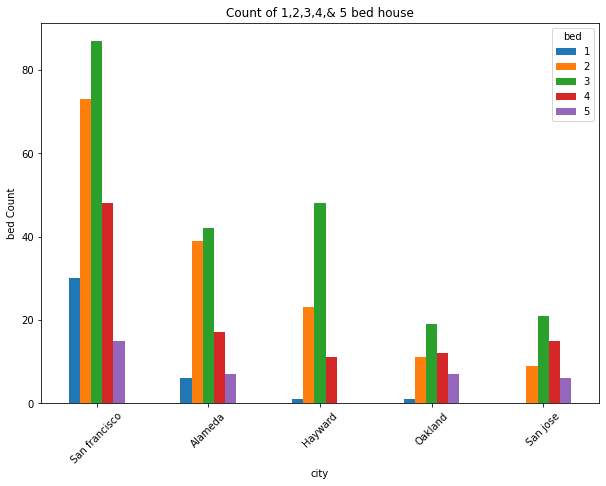

In [13]:
xt.loc[['San francisco','Alameda','Hayward', 'Oakland', 'San jose'],[1,2,3,4,5]].plot.bar(figsize=(10,7))

plt.title('Count of 1,2,3,4,& 5 bed house')
plt.ylabel('bed Count')
plt.xticks(rotation=45)

# Average price of House per bed in San Francisco, Alameda, Hayward, Oakland and San Jose

In [14]:
#Average price of house per bed in different cities
bed_average_price = df.groupby(['city','bed']).mean()
x = bed_average_price['price'].astype(np.int64)
x[['San francisco','Alameda','Hayward', 'Oakland', 'San jose']]

city           bed
San francisco  1.0     870468
               2.0    1386116
               3.0    1683325
               4.0    2339518
               5.0    3166932
               6.0    2290314
               7.0    4292500
               8.0    8145000
Alameda        1.0     501166
               2.0     805934
               3.0    1097681
               4.0    1383445
               5.0    1807857
               6.0    1441166
               7.0    1662666
               8.0    1849000
               9.0    2198000
Hayward        1.0     699888
               2.0     589032
               3.0     793728
               4.0    1285434
Oakland        1.0     669000
               2.0     757545
               3.0     959789
               4.0    1131499
               5.0    1367000
               6.0    1950000
               8.0    2249000
San jose       2.0     738864
               3.0    1146836
               4.0    1561699
               5.0    2202333
Name: price, dtype: i

# Crosstable for Average price of House per bed in San Francisco, Alameda, Hayward, Oakland and San Jose

In [15]:
#Average price of house with 1,2,3,4 and 5 bed in top 5 cities

ct = pd.crosstab(index=df['city'], columns=df['bed'], values=df['price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)

ct.loc[['San francisco','Alameda','Hayward', 'Oakland', 'San jose'],[1,2,3,4,5]] 

bed,1,2,3,4,5
city,,,,,
San francisco,870468,1386116,1683325,2339518,3166932
Alameda,501166,805934,1097681,1383445,1807857
Hayward,699888,589032,793728,1285434,0
Oakland,669000,757545,959789,1131499,1367000
San jose,0,738864,1146836,1561699,2202333


# Plotting Average price of House per bed in San Francisco, Alameda, Hayward, Oakland and San Jose

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'San francisco'),
  Text(1, 0, 'Alameda'),
  Text(2, 0, 'Hayward'),
  Text(3, 0, 'Oakland'),
  Text(4, 0, 'San jose')])

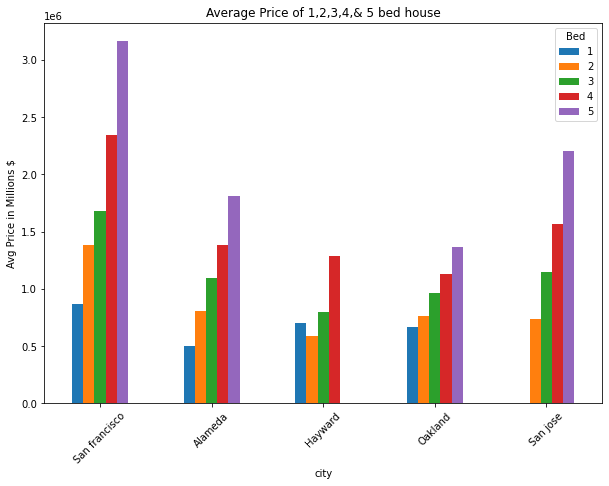

In [16]:
#Average prices of house per bed

ct.loc[['San francisco','Alameda','Hayward', 'Oakland', 'San jose'],[1,2,3,4,5]].plot.bar(figsize=(10,7))

plt.title('Average Price of 1,2,3,4,& 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

# Data set

In [17]:
import pandas as pd
import numpy as np
df=pd.read_csv('scrape_data_v1.csv',index_col=0)
df.head()

,street,city,state,zipcode,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,price_per_sqft
1,2260 A San Jose Ave,Alameda,CA,94501,689000,1.0,1.0,572.0,91,49.0,74.0,87.0,1204.55
2,888 Willow St,Alameda,CA,94501,1680000,5.0,5.5,3090.0,78,47.0,70.0,87.0,543.69
3,1071 Melrose Ave,Alameda,CA,94502,699000,2.0,2.0,1247.0,43,30.0,55.0,92.0,560.55
4,1041 Melrose Ave,Alameda,CA,94502,929000,3.0,2.5,1738.0,42,30.0,55.0,92.0,534.52
6,1837 Santa Clara Ave,Alameda,CA,94501,1280000,5.0,1.5,2310.0,85,48.0,82.0,87.0,554.11


# Average price of price_per_sqft for all the cities of California

In [18]:
import pandas as pd
a = df.groupby(by="city")
b=pd.DataFrame(a['price_per_sqft'].mean())
b

,price_per_sqft
city,
Alameda,655.625726
Albany,807.670000
Belmont,836.710000
Berkeley,847.841250
Burlingame,1237.960000
Campbell,878.263333
Castro valley,578.520000
Cupertino,1299.191250
Daly city,732.920000


# Top 5 and Bottom 5 cities in CA as per the Average price per square feet

In [19]:
Top5= pd.DataFrame(b.sort_values(by = 'price_per_sqft',ascending=False).head(5))
print(Top5)
Top5['Stack'] = 'Top5'
Bottom5= pd.DataFrame(b.sort_values(by = 'price_per_sqft',ascending=False).tail(5))
print(Bottom5)
Bottom5['Stack'] = 'Bottom5'

              price_per_sqft
city                        
Los altos         2764.61000
Moss beach        2187.50000
Palo alto         1835.57800
Monte sereno      1627.95000
Cupertino         1299.19125
            price_per_sqft
city                      
Long beach          399.00
Sacramento          362.89
Stockton            348.84
Riverside           259.48
Fresno              168.07


# Top 5 cities in CA as per the Average price per square feet


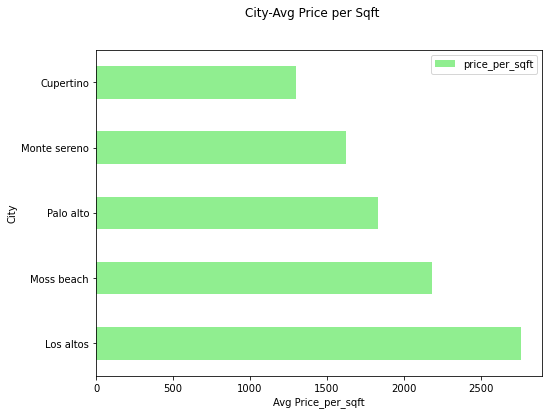

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Top5.plot(kind='barh',color='lightgreen',figsize=(8,6))
plt.xlabel("Avg Price_per_sqft")
plt.ylabel("City") 
plt.suptitle('City-Avg Price per Sqft')
plt.show()

# Bottom 5 cities in CA as per the Average price per square feet

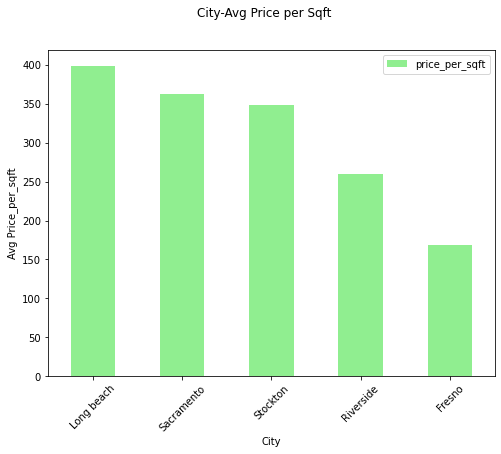

In [21]:
Bottom5.plot(kind='bar',color='lightgreen',figsize=(8,6))
plt.xlabel("City")
plt.ylabel("Avg Price_per_sqft") 
plt.suptitle('City-Avg Price per Sqft')
plt.xticks(rotation=45)
plt.show()

# Variation in Transit score as per city

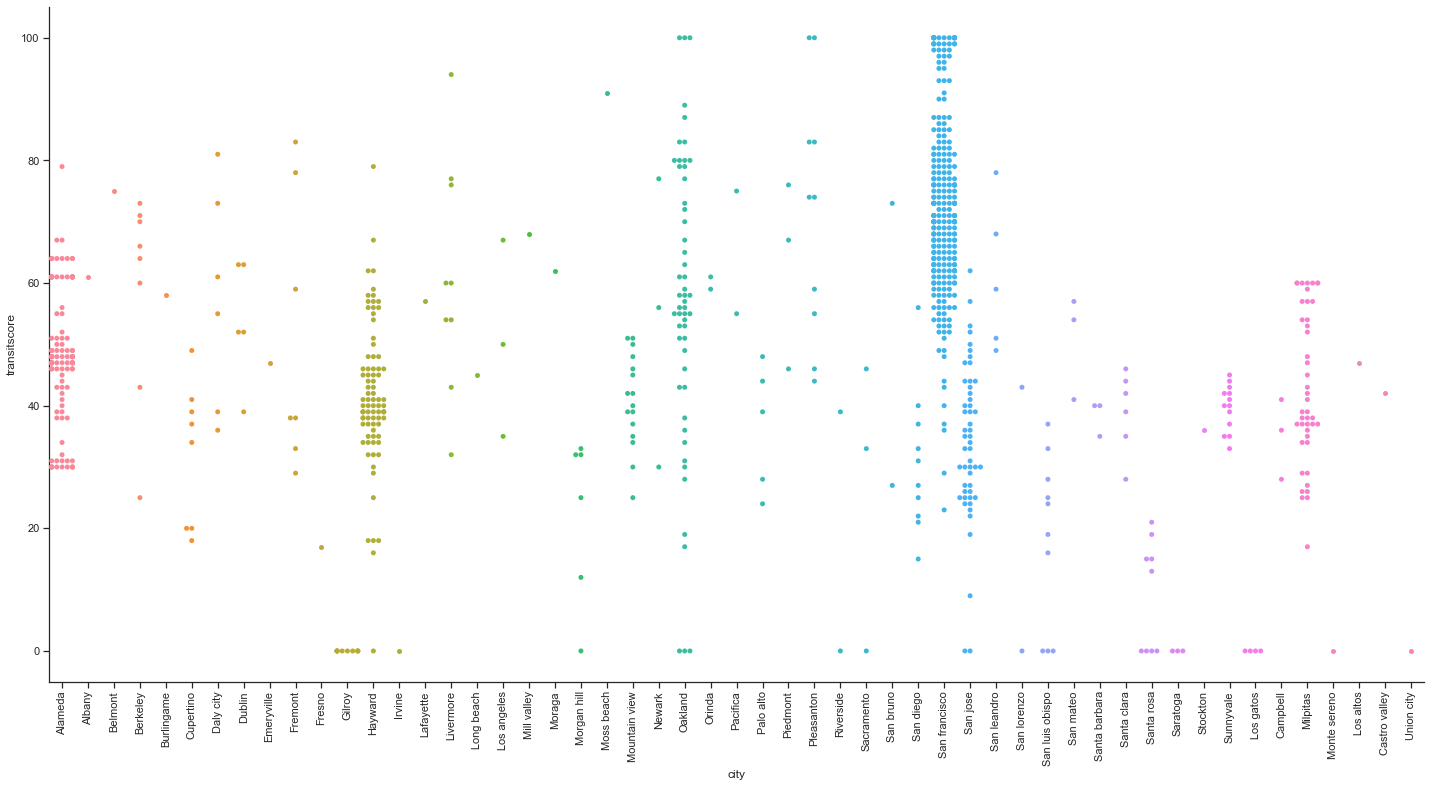

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data_df = pd.read_csv('scrape_data_v1.csv',index_col=0)
df = data_df.dropna(subset=['street', 'city', 'price', 'transitscore'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="city", y="transitscore", data=df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

# How good is the city transit system

90–100 Rider's Paradise (World-class public transportation) <br>
70–89 Excellent Transit (Transit is convenient for most trips) <br>
50–69 Good Transit (Many nearby public transportation options) <br>
25–49 Some Transit (A few nearby public transportation options) <br>
0–24 Minimal Transit (It is possible to get on a bus)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'San francisco'),
  Text(1, 0, 'Alameda'),
  Text(2, 0, 'Hayward'),
  Text(3, 0, 'Oakland'),
  Text(4, 0, 'San jose'),
  Text(5, 0, 'Milpitas'),
  Text(6, 0, 'Mountain view'),
  Text(7, 0, 'Sunnyvale')])

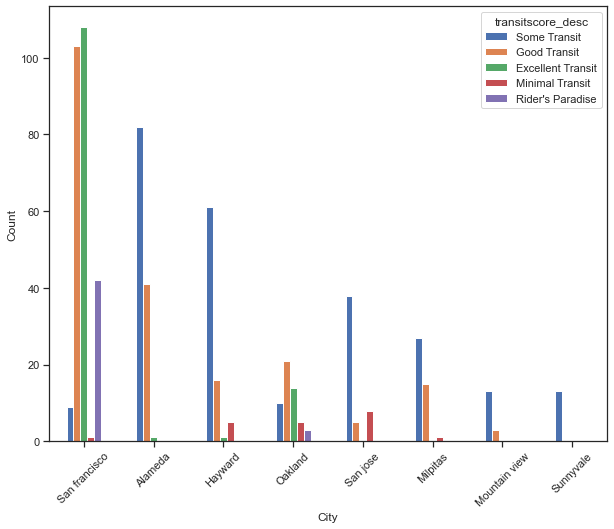

In [23]:
transit_score_desc_list = []
for t in df['transitscore']:
    if t <= 100 and t >= 90:
        transit_score_desc_list.append('Rider\'s Paradise')
    elif t <= 89 and t >= 70:
        transit_score_desc_list.append('Excellent Transit')
    elif t <= 69 and t >= 50:
        transit_score_desc_list.append('Good Transit')
    elif t <= 49 and t >= 25:
        transit_score_desc_list.append('Some Transit')
    elif t <= 24 and t >= 0:
        transit_score_desc_list.append('Minimal Transit')
    else:
        transit_score_desc_list.append('')
df['transitscore_desc'] = transit_score_desc_list
g = pd.crosstab(df['city'], df['transitscore_desc'])
cities_8 = ['San francisco', 'Alameda', 'Hayward', 'Oakland', 'San jose', 'Milpitas', 'Mountain view', 'Sunnyvale']
unique_ts = list(df['transitscore_desc'].unique())
g.loc[cities_8, unique_ts].plot.bar(figsize=(10,8))
plot.xlabel('City')
plot.ylabel('Count')
plot.xticks(rotation=45)

# Affect of transit system availability over house prices

Text(0.5, 1.0, 'Correlation between Price and Transit Scores')

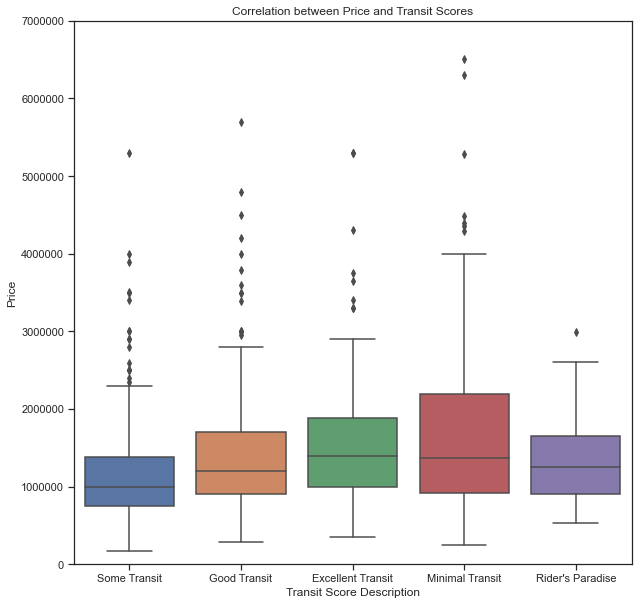

In [24]:
# Price range based on the transit score (averaged for each city)
plot.figure(figsize=(10,10))
sns.boxplot(x="transitscore_desc", y="price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 7000000)
plot.ylabel("Price")
plot.xlabel("Transit Score Description")
plot.title("Correlation between Price and Transit Scores")

# Check Correlation beytween attributes to determine relation between dependent and independent variables

<AxesSubplot:>

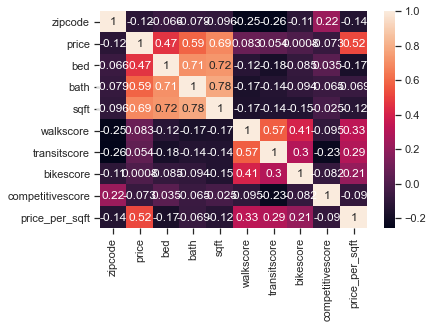

In [25]:
sns.heatmap(df.corr(),annot=True) #To determine correlation between continuos attributes

# Predicting price of a listing using Linear Regression

                         Coeff
bath              31548.424009
walkscore          2116.860888
price_per_sqft     1827.985068
competitivescore   1245.975249
sqft                792.611244
bikescore         -1098.049606
transitscore      -2196.915898
bed              -10246.373855


R^2 is:  0.8410448519293481


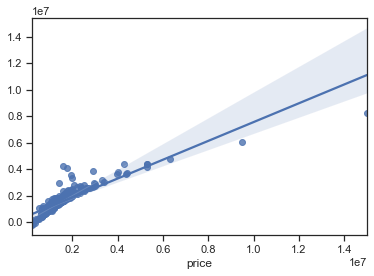

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df[['sqft','price_per_sqft','bed','bath']]=df[['sqft','price_per_sqft','bed','bath']].astype(float)

X=df[['walkscore','bed','sqft','bath','price_per_sqft','transitscore','competitivescore','bikescore']]
y=df['price']

lm=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

lm.fit(X_train,y_train) #fitting the model

predictions=lm.predict(X_test) #calculating predictions based on the model creaated in previous line

sns.regplot(y_test,predictions,fit_reg=True) #plotting the model

cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,y)) # Calculating R-square for the model

# Example 1 to test the model

In [27]:
# Prediction of price using linear model created in previous section

x=df.loc[40:40][['walkscore','bed','sqft','bath','price_per_sqft','transitscore','competitivescore','bikescore']]
y_pred = lm.intercept_ + np.sum(lm.coef_ * np.array(x))
print("True Price of House: ",df.loc[40:40][['price']])
print('')
print("Predicted price using model: ",y_pred)
print('')
print("Difference between true and precited value: ",df.loc[40:40][['price']]-y_pred)

True Price of House:        price
40  1995000

Predicted price using model:  1963576.216001711

Difference between true and precited value:             price
40  31423.783998


# Example 2 to test the model

In [28]:
# Prediction of price using linear model created in previous section

x=df.loc[192:192][['walkscore','bed','sqft','bath','price_per_sqft','transitscore','competitivescore','bikescore']]
y_pred = lm.intercept_ + np.sum(lm.coef_ * np.array(x))
print("True Price of House: ",df.loc[192:192][['price']])
print('')
print("Predicted price using model: ",y_pred)
print('')
print("Difference between true and precited value: ",df.loc[192:192][['price']]-y_pred)

True Price of House:        price
192  779000

Predicted price using model:  776840.0138794498

Difference between true and precited value:             price
192  2159.986121
